# Projet math info

Le principe de ce projet est de tracer les lignes de niveau d'une fonction f à deux variables.
Pour cela on décompose le code en différentes étapes. 

L'espace sur lequel on travaille est divisé en carrés.

Sur chacun de ces carrés une dichotomie permet de déterminer quel point sur les bords est sur la ligne de niveau pour la valeur c qui nous intéresse. On initie ainsi la ligne de niveau.
Cela étant dit on réalise ici l'hypothèse de monotonie le long des bords, raisonnable si on découpe assez finement.

Pour la continuer on s'intéresse au point suivant du carré, tel qu'il est situé à la fois sur la ligne de niveau et à une distance delta du point précédent.
Une première idée est d'utiliser les propriétés du gradient et notamment le fait qu'il soit orthogonal à la ligne de niveau. La tangente à la ligne de niveau est donc dirigée par le vecteur orthogonal au gradient. On approche ainsi le point suivant en avançant d'une distance delta le long de la tangente. Il s'agit alors de corriger l'erreur réalisée, dit autrement d'annuler la fonction F : (x,y) --> (f(x,y)-c, (x-x0)^2 + (y-y0)^2 - delta^2) (avec (x0, y0) le point initial). On réalise une méthode de Newton en initialisant au point grossier que l'on avait obtenu.
Pour cela, on calcule la Jacobienne J de F au point (x0, y0) puis la suite de points de la méthode de Newton est donnée par la relation de récurrence : Xk+1 = Xk - J^(-1)(Xk) * F(Xk).

Dans le cas où cette jacobienne ne serait pas inversible on considère le point trouvé grâce à la tangente (sans correction) ou grâce à l'avancement interrompu de la fonction Newton.

## Premier programme (sans choix de la direction du gradient)

In [109]:
def find_seed(g, c = 0, eps = 2.0**(-26)):
    maxi = 1.0
    mini = 0.0
    if (c < g(0,0) and c < g(0,1)) or (c > g(0,0) and c > g(0,1)):
        return None
    else:
        while maxi - mini > eps:
            milieu = (mini + maxi)/2.0
            if (g(0,milieu) - c) * (g(0,maxi) - c) >= 0.0:
                maxi = milieu
            else :
                mini = milieu
        return (maxi + mini)/2.0

#c'est un algorithme de dichotomie classique    



import autograd
from autograd import numpy as np
import matplotlib.pyplot as plt


def grad(f, x, y):
    g = autograd.grad
    return np.r_[g(f, 0)(x, y), g(f, 1)(x, y)]

#retourne le gradient



def jacob(f, x, y):
    j = autograd.jacobian
    return np.c_[j(f, 0)(x, y), j(f, 1)(x, y)]

#retourne la jacobienne



def newton(F, Xk):
    """Xk doit être un array"""
    J = jacob(F, Xk[0], Xk[1])
    try:
        Jinv = np.linalg.inv(J)             #on n'inverse que si elle est inversible
    except:
        return Xk
    Fk = F(Xk[0], Xk[1])
    J2 = np.dot(Jinv, Fk)
    Xkp1 = Xk - J2
    while  np.linalg.norm(Xkp1 - Xk) > 10**(-3):
        Xk = Xkp1
        J = jacob(F, Xkp1[0], Xkp1[1])
        try:
            Jinv = np.linalg.inv(J)         #on n'inverse que si elle est inversible
        except:
            return Xk
        Fk = F(Xkp1[0], Xkp1[1])
        J2 = np.dot(Jinv, Fk)
        Xkp1 = Xkp1 - J2   
    return Xkp1

#méthode de Newton pour une fonction de R**2 dans R**2

def simple_contour (f, c = 0.0, delta = 0.01):
    t = find_seed(f, c, eps = 2.0**(-26))
    if t == None:
        return [],[]
    lsx = [0.0]
    lsy = [t]
    x0 = lsx[-1]
    y0 = lsy[-1]
    def F(x,y):
            return np.r_[f(x, y) - c, (x-x0)**2 + (y-y0)**2 - delta**2]
    while lsx[-1] >= 0.0 and lsx[-1] <= 1.0 and lsy[-1] >= 0.0 and lsy[-1] <= 1.0:
        x0 = lsx[-1]
        y0 = lsy[-1]
        X0 = np.r_[x0, y0]
        gradient = grad(f, x0, y0)
        coeffdir = np.r_[-gradient[1], gradient[0]]              #ainsi coeffdir est orthogonal au gradient
        X1 = X0 + delta / np.linalg.norm(coeffdir) * coeffdir
        X2 = newton(F, X1)
        lsx += [X2[0]]
        lsy += [X2[1]]
    return lsx, lsy

## arc de cercle

C:\Users\riedisheim\Anaconda3\lib\site-packages\autograd\numpy\numpy_wrapper.py:66: UserWarning: r_ is slow for array inputs. np.concatenate() is faster.
  "np.concatenate() is faster.".format(slow_op_name))


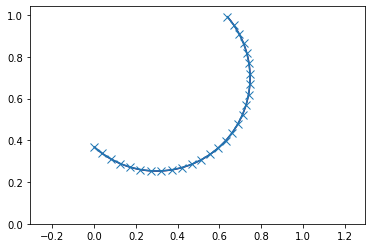

In [110]:
def f(x,y):
    return ((x-0.3)**2 + (y-0.7)**2)/2
def g(x,y):
    return ((x-0.3)**2 + (y-0.7)**2)/2


a=simple_contour(f,0.1)
B=a[0][::5]
C=a[1][::5]

#pour une meilleure visiblité tous les points ne sont pas représentés

plt.plot(B,C, marker='x', markersize = 8)

gnp=np.vectorize(g)

X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = gnp(X, Y)
plt.axis('equal')
plt.contour(X, Y, Z, [0.1])

plt.axis('equal')
plt.show()

#les croix correspondent au contour tracé par la fonction simple_contour
#le trait plein correspond au contour tracé par la fonction contour de la bibliothèque numpy

Ce tracé est très satisfaisant : la fonction contour de matplotlib suit bien les points que simple_contour a trouvés

## avec le gradient dans l'autre sens

On s'intéresse ici à une fonction dont le gradient est orienté dans le sens opposé au départ à la fonction précédente.

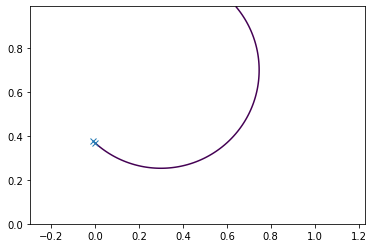

In [111]:
def f(x,y):
    return -((x-0.3)**2 + (y-0.7)**2)/2
def g(x,y):
    return -((x-0.3)**2 + (y-0.7)**2)/2

plt.clf()
a=simple_contour(f,-0.1)
plt.plot(a[0],a[1], marker='x')
gnp=np.vectorize(g)
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = gnp(X, Y)
plt.axis('equal')
plt.contour(X, Y, Z, [-0.1])
plt.show()

#les croix correspondent au contour tracé par la fonction simple_contour
#le trait plein correspond au contour tracé par la fonction contour de la bibliothèque numpy

On remarque un gros probelème. Il faut donc implémenter le code de sorte à choisir la bonne direction à emprunter selon la tangente à la ligne de niveau (orthogonale au gradient).

## Deuxième programme (avec choix de la direction du gradient)

On réalise un test sur le gradient au point initial pour faire "partir" la figure vers le "bon côté"

In [113]:
def sens_grad(grad_y):
    if grad_y > 0:          #ce n'est que pour un gradient dirigé vers le haut que nous avons un problème 
        return -1
    else:
        return 1

def simple_contour2 (f, c = 0.0, delta = 0.01):
    t = find_seed(f, c, eps = 2.0**(-26))
    if t == None:
        return [],[]
    lsx = [0.0]
    lsy = [t]
    x0 = lsx[-1]
    y0 = lsy[-1]
    gradient = grad(f, x0, y0)
    a = sens_grad(gradient[1])
    def F(x,y):
            return np.r_[f(x, y) - c, (x-x0)**2 + (y-y0)**2 - delta**2]
    while lsx[-1] >= 0.0 and lsx[-1] <= 1.0 and lsy[-1] >= 0.0 and lsy[-1] <= 1.0:
        x0 = lsx[-1]
        y0 = lsy[-1]
        X0 = np.r_[x0, y0]
        gradient = grad(f, x0, y0)
        coeffdir = np.r_[-a*gradient[1], a*gradient[0]]            #on oriente le vecteur directeur dans le bon sens
        X1 = X0 + delta / np.linalg.norm(coeffdir) * coeffdir
        X2 = newton(F, X1)
        lsx += [X2[0]]
        lsy += [X2[1]]
    return lsx, lsy

### arc de cercle

Dans ce cas là la fonction sens_grad doit renvoyer 1 ce qui ne change rien au premier tracé

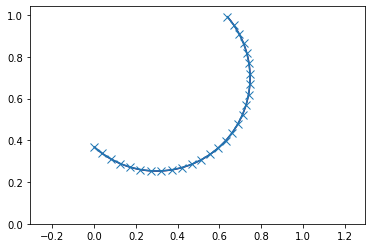

In [114]:
def f(x,y):
    return ((x-0.3)**2 + (y-0.7)**2)/2
def g(x,y):
    return ((x-0.3)**2 + (y-0.7)**2)/2


a=simple_contour2(f,0.1)
B=a[0][::5]
C=a[1][::5]

#pour une meilleure visiblité tous les points ne sont pas représentés

plt.plot(B,C, marker='x', markersize = 8)


gnp=np.vectorize(g)

X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = gnp(X, Y)
plt.axis('equal')
plt.contour(X, Y, Z, [0.1])

plt.axis('equal')
plt.show()

#les croix correspondent au contour tracé par la fonction simple_contour2
#le trait plein correspond au contour tracé par la fonction contour de la bibliothèque numpy

### Avec le gradient dans l'autre sens

Ici la fonction sens_grad doit renvoyer -1 et corriger l'erreur du deuxième tracé.

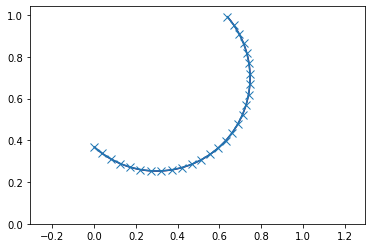

In [115]:
def f(x,y):
    return -((x-0.3)**2 + (y-0.7)**2)/2
def g(x,y):
    return -((x-0.3)**2 + (y-0.7)**2)/2

plt.clf()

a=simple_contour2(f,-0.1)
B=a[0][::5]
C=a[1][::5]

#pour une meilleure visiblité tous les points ne sont pas représentés

plt.plot(B,C, marker='x', markersize = 8)

gnp=np.vectorize(g)
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = gnp(X, Y)
plt.axis('equal')
plt.contour(X, Y, Z, [-0.1])
plt.show()

#les croix correspondent au contour tracé par la fonction simple_contour2
#le trait plein correspond au contour tracé par la fonction contour de la bibliothèque numpy

C'est bien ce qu'on observe.

# Contour complexe 

In [21]:
#La fonction suivante a été écrite par M. Sébastien Boisgérault https://github.com/boisgera

In [116]:

# Rotators
# ------------------------------------------------------------------------------
LEFT, UP, RIGHT, DOWN = 0, 1, 2, 3  # clockwise


def rotate_direction(direction, n=1):
    return (direction + n) % 4


def rotate(x, y, n=1):
    if n == 0:
        return x, y
    elif n >= 1:
        return rotate(1 - y, x, n - 1)
    else:
        assert n < 0
        return rotate(x, y, n=-3 * n)


def rotate_function(f, n=1):
    def rotated_function(x, y):
        xr, yr = rotate(x, y, -n)
        return f(xr, yr)

    return rotated_function


# Complex Contouring
# ------------------------------------------------------------------------------

# Customize the simple_contour function used in contour :
# simple_contour = smart_simple_contour


def contour1(f, c, xs=[0.0, 1.0], ys=[0.0, 1.0], delta=0.01):
    curves = []
    nx, ny = len(xs), len(ys)
    for i in range(nx - 1):
        for j in range(ny - 1):
            xmin, xmax = xs[i], xs[i + 1]
            ymin, ymax = ys[j], ys[j + 1]

            def f_cell(x, y):
                return f(xmin + (xmax - xmin) * x, ymin + (ymax - ymin) * y)

            done = set()
            for n in [0, 1, 2, 3]:
                if n not in done:
                    rotated_f_cell = rotate_function(f_cell, n)
                    x_curve_r, y_curve_r = simple_contour2(rotated_f_cell, c, delta)
                    exit = None
                    if len(x_curve_r) >= 1:
                        xf, yf = x_curve_r[-1], y_curve_r[-1]
                        if xf == 0.0:
                            exit = LEFT
                        elif xf == 1.0:
                            exit = RIGHT
                        elif yf == 0.0:
                            exit = DOWN
                        elif yf == 1.0:
                            exit = UP
                    if exit is not None:  # a fully successful contour fragment
                        exit = rotate_direction(exit, n)
                        done.add(exit)

                    x_curve, y_curve = [], []
                    for x_r, y_r in zip(x_curve_r, y_curve_r):
                        x, y = rotate(x_r, y_r, n=-n)
                        x_curve.append(x)
                        y_curve.append(y)
                    x_curve = np.array(x_curve)
                    y_curve = np.array(y_curve)
                    curves.append((xmin + (xmax - xmin) * x_curve, ymin + (ymax - ymin) * y_curve))
    return curves

In [ ]:
"""Les valeurs renvoyées ne sont pas conformes à la documentation fournie dans le document « Calcul Différentiel II »

Si

level_curves = contour1(f, c, xs, ys) alors level_curves est une liste de paires (x, y) qui représentent un fragment de ligne de niveau (x et y sont des tableaux mono-dimensionnels). 
Autrement, dit, l’ensemble des fragments peut être tracé avec :

for x, y in level_curves:
    matplotlib.pyplot.plot(x, y)"""

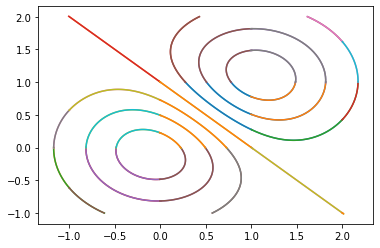

In [117]:
def h1(x, y):
    return np.exp(-x**2 - y**2)

def h2(x, y):
    return np.exp(-(x-1)**2-(y-1)**2)

def h(x, y):
    return 2*(h1(x, y) - h2(x, y))

for c in {-1.5, -1.0, -0.5, 0.5, 1.0, 1.5}:
    level_curves = contour1(h, c, [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0], [-1.0, 0.0, 1.0, 2.0])
    for x, y in level_curves:
        plt.plot(x, y)
level_curves = contour1(h, 0.0, [-2.0, -1.01, 0.0, 1.01, 2.0, 3.0], [-1.01, 0.0, 1.01, 2.0])
for x, y in level_curves:
        plt.plot(x, y)

plt.show()

On obtient un résultat très satisfaisant (malgré un temps d'exécution assez long)